# Загрузка данных
Из CSV-файла **Boston-house-price-data.csv** считывается таблица с признаками и целевой переменной (**MEDV** — медианная стоимость домов).


# Вывод базовой информации
Отображается **размер датасета** (количество строк и столбцов).  
Выводятся **статистические характеристики** признаков: среднее, стандартное отклонение, минимальные и максимальные значения, а также квартильные показатели.


# Визуализация распределений
Строится **гистограмма распределения целевой переменной MEDV**, чтобы понять, как распределены цены на жильё.  
Затем визуализируются **распределения всех остальных признаков** (кроме MEDV), чтобы проанализировать форму данных, разброс и наличие выбросов.


# Цель анализа
Получить общее представление о **структуре и характере данных** перед последующей предобработкой и построением моделей машинного обучения.


In [5]:
import sys
print(sys.executable)

d:\Dev\ML_lab\venv\Scripts\python.exe


Размер датасета: (506, 14)

Статистика по признакам:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154  

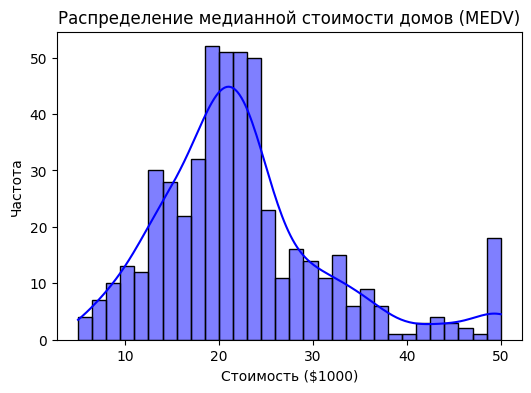

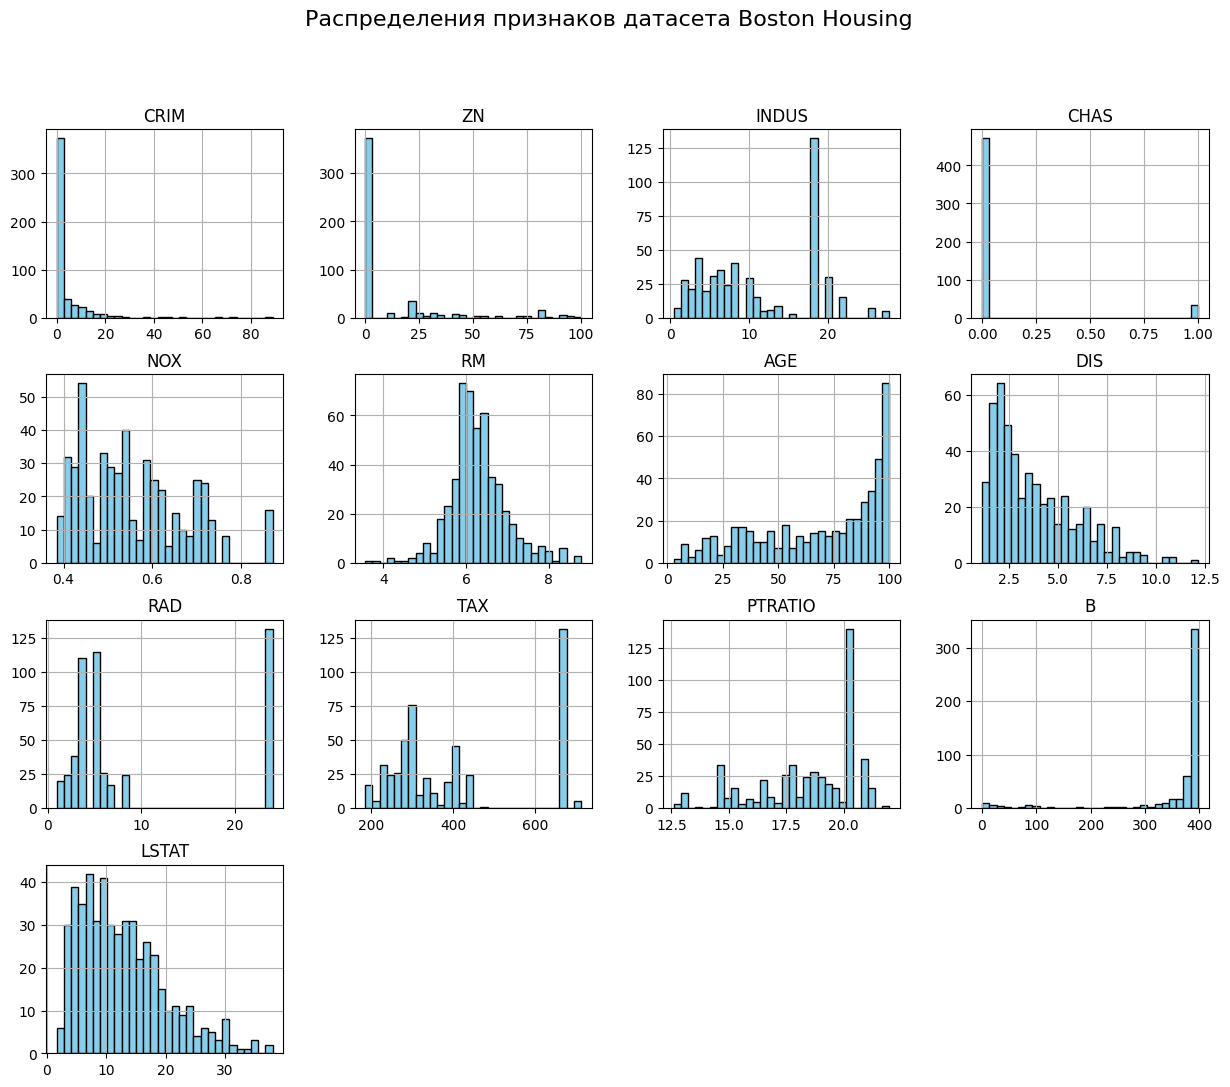

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Boston-house-price-data.csv", sep=",")


print("Размер датасета:", data.shape)


print("\nСтатистика по признакам:")
print(data.describe())


plt.figure(figsize=(6,4))
sns.histplot(data["MEDV"], bins=30, kde=True, color="blue")
plt.title("Распределение медианной стоимости домов (MEDV)")
plt.xlabel("Стоимость ($1000)")
plt.ylabel("Частота")
plt.show()


data.drop(columns=["MEDV"]).hist(
    bins=30, figsize=(15,12), color="skyblue", edgecolor="black"
)
plt.suptitle("Распределения признаков датасета Boston Housing", fontsize=16)
plt.show()


# Загрузка данных
Из CSV-файла считывается таблица с признаками и целевой переменной (**MEDV** — медианная стоимость домов).


# Очистка данных
Удаляются все строки с пропущенными значениями, чтобы избежать ошибок при обучении модели.



# Разделение данных
**y** — целевая переменная (**MEDV**), отражающая цену.  
**X** — матрица признаков без категориальных столбцов **CHAS** и **RAD** (так как PCA и регрессия требуют числовые непрерывные признаки).


# Нормализация признаков
С помощью **MinMaxScaler** все значения признаков приводятся к диапазону **[0, 1]**.  
Это необходимо, чтобы избежать доминирования признаков с большими числовыми диапазонами.


# Возврат результата
Функция возвращает нормализованные признаки **X** и целевую переменную **y**, готовые для дальнейшего анализа и моделирования.


# Вывод информации
В конце выводятся размеры матрицы признаков и целевой переменной, а также первые строки нормализованных данных.


In [ ]:
# preprocessing.py

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def preprocess_boston(file_path: str):
    """
    Предобработка датасета Boston Housing:
    1. Чтение CSV
    2. Удаление пропущенных значений
    3. Удаление категориальных признаков (CHAS, RAD)
    4. Нормализация признаков (Min-Max)
    
    :param file_path: путь к CSV файлу
    :return: (X, y) - признаки и целевая переменная
    """

    data = pd.read_csv(file_path, sep=",")


    data = data.dropna()


    y = data["MEDV"]

 
    data = data.drop(columns=["CHAS", "RAD"])

 
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(data)


    X = pd.DataFrame(X_scaled, columns=data.columns)

    return X, y


X, y = preprocess_boston("Boston-house-price-data.csv")
print("Размер признаков:", X.shape)
print("Размер целевой переменной:", y.shape)
print("\nПервые строки нормализованных данных:")
print(X.head())


Размер признаков: (506, 12)
Размер целевой переменной: (506,)

Первые строки нормализованных данных:
       CRIM    ZN     INDUS       NOX        RM       AGE       DIS       TAX  \
0  0.000000  0.18  0.067815  0.314815  0.577505  0.641607  0.269203  0.208015   
1  0.000236  0.00  0.242302  0.172840  0.547998  0.782698  0.348962  0.104962   
2  0.000236  0.00  0.242302  0.172840  0.694386  0.599382  0.348962  0.104962   
3  0.000293  0.00  0.063050  0.150206  0.658555  0.441813  0.448545  0.066794   
4  0.000705  0.00  0.063050  0.150206  0.687105  0.528321  0.448545  0.066794   

    PTRATIO         B     LSTAT      MEDV  
0  0.287234  1.000000  0.089680  0.422222  
1  0.553191  1.000000  0.204470  0.368889  
2  0.553191  0.989737  0.063466  0.660000  
3  0.648936  0.994276  0.033389  0.631111  
4  0.648936  1.000000  0.099338  0.693333  


# Загрузка и предобработка данных

Из CSV-файла считываются данные, удаляются пропуски.  
Исключаются категориальные переменные **CHAS** и **RAD**, а также целевая переменная **MEDV**.  
Признаки нормализуются с помощью **MinMaxScaler**, чтобы все значения находились в диапазоне **[0, 1]**.


# Матрица корреляций

Строится **тепловая карта корреляций (heatmap)** с помощью **seaborn**.  
По карте можно визуально определить пары признаков, которые сильно коррелированы между собой (например, коэффициент > 0.8).  
Высокая корреляция указывает на возможную **мультиколлинеарность**.


# Расчёт VIF (Variance Inflation Factor)

Для каждого признака вычисляется **коэффициент инфляции дисперсии (VIF)** — количественная мера мультиколлинеарности.  
VIF показывает, насколько сильно дисперсия коэффициентов линейной регрессии увеличивается из-за коррелирующих признаков.

**Интерпретация VIF:**
`VIF < 5` — нормальный уровень.  
`VIF 5–10` — умеренная мультиколлинеарность.  
`VIF > 10` — сильная мультиколлинеарность (признак следует исключить или обработать).


# Вывод

Таблица с рассчитанными значениями VIF помогает определить, какие признаки следует **исключить или преобразовать** (например, с помощью PCA) для стабилизации модели.


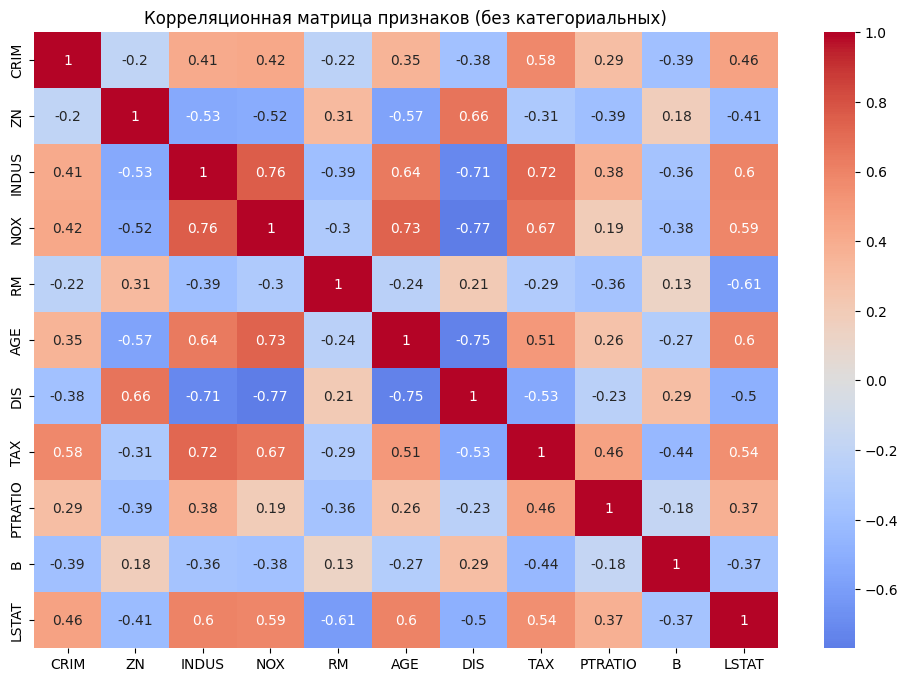

VIF-коэффициенты:
    feature       VIF
3       NOX  4.294324
6       DIS  3.953729
2     INDUS  3.660714
7       TAX  3.403205
5       AGE  3.077311
10    LSTAT  2.928554
1        ZN  2.272992
4        RM  1.880883
8   PTRATIO  1.725085
0      CRIM  1.663648
9         B  1.338875


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np


def preprocess_boston(file_path: str):
    data = pd.read_csv(file_path, sep=",")
    data = data.dropna()
    y = data["MEDV"]
    data = data.drop(columns=["CHAS", "RAD","MEDV"])
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(data)
    X = pd.DataFrame(X_scaled, columns=data.columns)
    return X, y

X, y = preprocess_boston("Boston-house-price-data.csv")


plt.figure(figsize=(12, 8))
corr_matrix = X.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Корреляционная матрица признаков (без категориальных)")
plt.show()


X_with_const = np.append(np.ones((X.shape[0], 1)), X.values, axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_with_const, i+1)
    for i in range(len(X.columns))
]

print("VIF-коэффициенты:")
print(vif_data.sort_values(by="VIF", ascending=False))


# Анализ и оценка регрессионных моделей на данных Boston Housing

## Предобработка данных
Загружается CSV-файл **`Boston-house-price-data.csv`**.  
Удаляются пропущенные значения.  
Исключаются категориальные признаки **`CHAS`** и **`RAD`**, а также целевая переменная **`MEDV`**.  
Признаки нормализуются с помощью **`MinMaxScaler`**, чтобы привести их к единому масштабу **[0, 1]**.



## Разделение данных
Датасет делится на тренировочную и тестовую выборки:  
  - 80% данных — для обучения,  
  - 20% данных — для тестирования.  

Это позволяет оценить, насколько хорошо модель обобщает знания на новых данных.



## Метрики качества
Для оценки моделей используются следующие метрики:  
- **R² (коэффициент детерминации)** — показывает, какую долю дисперсии целевой переменной объясняет модель.  
- **RMSE (Root Mean Square Error)** — среднеквадратичная ошибка, характеризует точность прогноза.  
- **MAPE (Mean Absolute Percentage Error)** — средняя абсолютная процентная ошибка, показывает отклонение предсказаний в процентах.



## Кросс-валидация
Применяется **5-кратная кросс-валидация (KFold)**. Она позволяет оценить стабильность модели на разных подвыборках данных и уменьшить переобучение.



## Модели регрессии
**Linear Regression (Линейная регрессия)** — базовая модель, строит линейную зависимость между признаками и целевой переменной.  
**Ridge Regression (Гребневая регрессия)** — линейная регрессия с L2-регуляризацией, снижает влияние мультиколлинеарности и уменьшает переобучение.



## Оценка моделей
Для обеих моделей вычисляются:  
- среднее значение **R²** по кросс-валидации,  
- **R²**, **RMSE** и **MAPE** на тестовой выборке.



## Визуализация результатов
Строятся два графика:  
1. **Linear Regression** — сравнение фактических и предсказанных значений **MEDV**.  
2. **Ridge Regression** — аналогичный график для Ridge-модели.  

Красная пунктирная линия на графиках обозначает идеальное совпадение предсказаний с фактическими значениями (**y_pred = y_true**).




=== Линейная регрессия ===
CV R² среднее: 0.7117328201173221
R² на тесте: 0.6307780105854286
RMSE на тесте: 5.203503176683112
MAPE на тесте: 18.570122337927565

=== Гребневая регрессия (Ridge) ===
CV R² среднее: 0.7085799757486388
R² на тесте: 0.6478201124812358
RMSE на тесте: 5.081996015811896
MAPE на тесте: 17.722396347037453


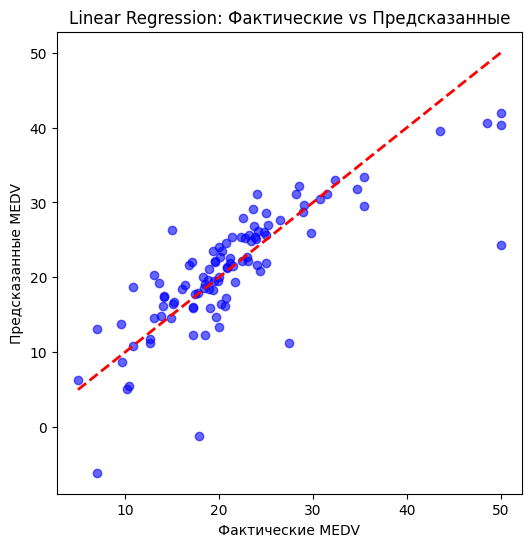

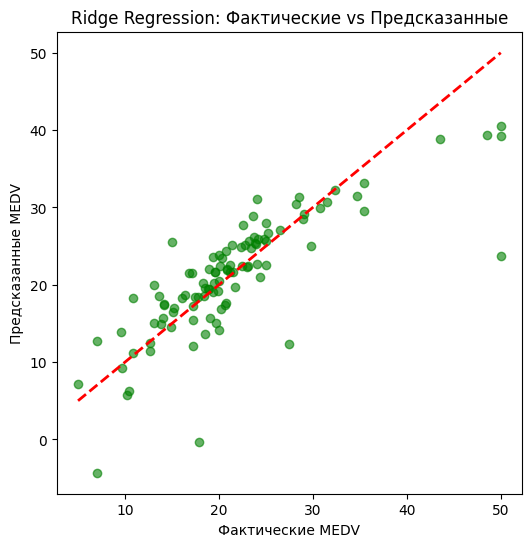

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


def preprocess_boston(file_path: str):
    data = pd.read_csv(file_path, sep=",")
    data = data.dropna()
    y = data["MEDV"]
    data = data.drop(columns=["CHAS", "RAD","MEDV"])
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(data)
    X = pd.DataFrame(X_scaled, columns=data.columns)
    return X, y


X, y = preprocess_boston("Boston-house-price-data.csv")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


kf = KFold(n_splits=5, shuffle=True, random_state=42)


lr = LinearRegression()
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("=== Линейная регрессия ===")
print("CV R² среднее:", np.mean(cv_scores_lr))
print("R² на тесте:", r2_score(y_test, y_pred_lr))
print("RMSE на тесте:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAPE на тесте:", mean_absolute_percentage_error(y_test, y_pred_lr))


ridge = Ridge(alpha=1.0)
cv_scores_ridge = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='r2')
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\n=== Гребневая регрессия (Ridge) ===")
print("CV R² среднее:", np.mean(cv_scores_ridge))
print("R² на тесте:", r2_score(y_test, y_pred_ridge))
print("RMSE на тесте:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAPE на тесте:", mean_absolute_percentage_error(y_test, y_pred_ridge))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические MEDV")
plt.ylabel("Предсказанные MEDV")
plt.title("Linear Regression: Фактические vs Предсказанные")
plt.show()


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические MEDV")
plt.ylabel("Предсказанные MEDV")
plt.title("Ridge Regression: Фактические vs Предсказанные")
plt.show()


# Предобработка и анализ главных компонент (PCA)

## Предобработка данных
Загружается датасет **`Boston-house-price-data.csv`**.  
Удаляются пропущенные значения (`NaN`).  
Исключаются категориальные признаки **`CHAS`**, **`RAD`** и целевая переменная **`MEDV`**.  
Все признаки нормализуются с помощью **`MinMaxScaler`**, чтобы привести их к диапазону **[0, 1]**.



## Стандартизация данных
Для корректной работы метода PCA признаки дополнительно стандартизируются с помощью **`StandardScaler`**, чтобы каждый имел среднее значение **0** и стандартное отклонение **1**.  
Это важно, чтобы главные компоненты не зависели от масштаба исходных переменных.



## Проведение анализа PCA
Метод **главных компонент (PCA)** применяется ко всем признакам.  
Вычисляются следующие показатели:

**`explained_variance_ratio_`** — доля дисперсии, объясняемая каждой компонентой (используется для убывающего графика).  
**`cumulative_explained_variance`** — накопленная доля объяснённой дисперсии (используется для возрастающего графика).



## Поиск оптимального числа компонент
Реализован **метод локтя (elbow method)**:

Используется **геометрический подход** — определяется точка, наиболее удалённая от прямой, проведённой между первой и последней компонентой (метод максимального расстояния).  
Эта точка считается **"локтем"**, то есть моментом, после которого добавление новых компонент почти не увеличивает объяснённую дисперсию.

Дополнительно вычисляется:
Количество компонент, необходимых для объяснения **95% дисперсии данных**.



## Визуализация результатов
Создаются два графика:

1. **Scree plot (убывающий график)** — показывает, как уменьшается доля объяснённой дисперсии с увеличением номера компоненты.  
   - Красная пунктирная линия отмечает найденный **“локоть”**.  

2. **Cumulative explained variance (накопленная дисперсия)** — показывает, как растёт суммарная объяснённая дисперсия.  
   - Серо-зелёные линии указывают **порог 95%** и соответствующее количество компонент.




Локоть (по explained variance) найден на компоненте: 2
Количество компонент для 95% накопленной дисперсии: 9
Исходное число признаков: 11


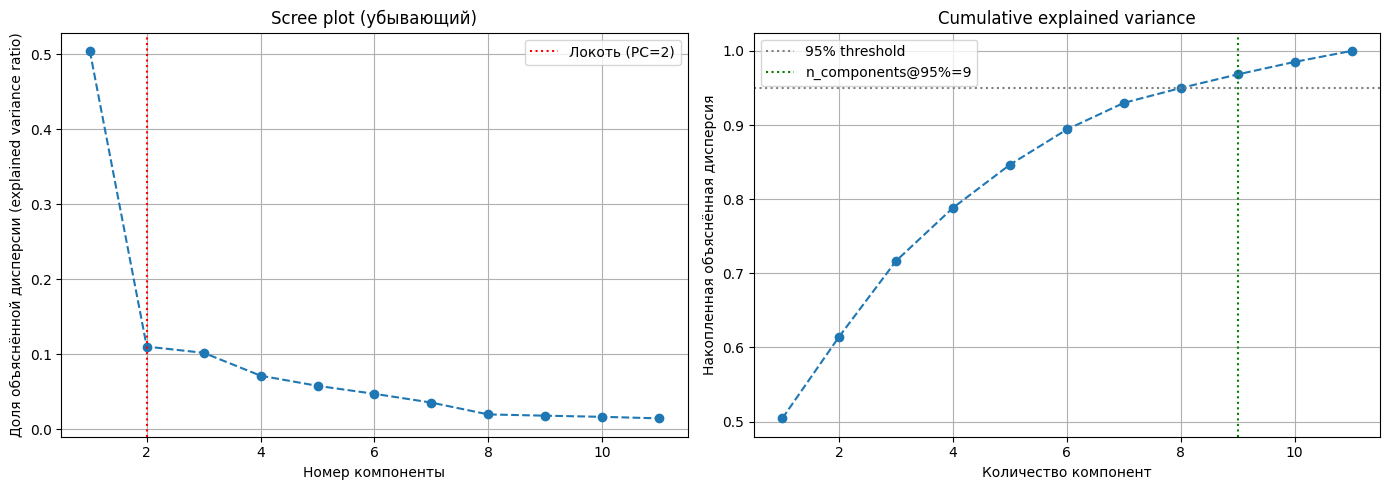

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA


def preprocess_boston(file_path: str):
    data = pd.read_csv(file_path, sep=",")
    data = data.dropna()
    y = data["MEDV"]
    data = data.drop(columns=["CHAS", "RAD","MEDV"])
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(data)
    X = pd.DataFrame(X_scaled, columns=data.columns)
    return X, y

X, y = preprocess_boston("Boston-house-price-data.csv")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca_full = PCA().fit(X_scaled)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)


def find_elbow_by_max_distance(vals):

    n = len(vals)
    xs = np.arange(1, n+1)
    ys = vals
 
    x1, y1 = xs[0], ys[0]
    x2, y2 = xs[-1], ys[-1]

    num = np.abs((y2 - y1)*xs - (x2 - x1)*ys + x2*y1 - y2*x1)
    den = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    d = num / den
    elbow_index = np.argmax(d)
    return elbow_index + 1, d

elbow_pc, distances = find_elbow_by_max_distance(explained)


n_95 = np.searchsorted(cum_explained, 0.95) + 1

print(f"Локоть (по explained variance) найден на компоненте: {elbow_pc}")
print(f"Количество компонент для 95% накопленной дисперсии: {n_95}")
print(f"Исходное число признаков: {X.shape[1]}")


fig, axes = plt.subplots(1, 2, figsize=(14,5))


axes[0].plot(np.arange(1, len(explained)+1), explained, marker='o', linestyle='--')
axes[0].set_xlabel("Номер компоненты")
axes[0].set_ylabel("Доля объяснённой дисперсии (explained variance ratio)")
axes[0].set_title("Scree plot (убывающий)")
axes[0].grid(True)
axes[0].axvline(elbow_pc, color='red', linestyle=':', label=f'Локоть (PC={elbow_pc})')
axes[0].legend()


axes[1].plot(np.arange(1, len(cum_explained)+1), cum_explained, marker='o', linestyle='--')
axes[1].set_xlabel("Количество компонент")
axes[1].set_ylabel("Накопленная объяснённая дисперсия")
axes[1].set_title("Cumulative explained variance")
axes[1].grid(True)
axes[1].axhline(0.95, color='gray', linestyle=':', label='95% threshold')
axes[1].axvline(n_95, color='green', linestyle=':', label=f'n_components@95%={n_95}')
axes[1].legend()

plt.tight_layout()
plt.show()


# Сравнение линейных моделей до и после PCA на данных Boston Housing

## 1. Импорт библиотек
Подключаются библиотеки для работы с данными (`pandas`, `numpy`), построения графиков (`matplotlib`), машинного обучения (`scikit-learn`) и анализа ошибок.

## 2. Определение функции MAPE
Создаётся функция `mean_absolute_percentage_error`, вычисляющая среднюю абсолютную процентную ошибку (MAPE), которая показывает, насколько в среднем предсказания модели отклоняются от реальных значений в процентах.

## 3. Предобработка данных
Функция `preprocess_boston()`:
Загружает CSV-файл с данными о ценах на жильё в Бостоне.  
Удаляет пропуски (`dropna`).  
Отделяет целевую переменную `MEDV` (цена дома).  
Исключает категориальные признаки `CHAS` и `RAD`.  
Масштабирует признаки в диапазоне [0,1] с помощью `MinMaxScaler`.  

Возвращает нормализованные признаки `X` и целевой столбец `y`.

## 4. Стандартизация и PCA
Для корректного применения метода главных компонент (PCA):
Признаки стандартизируются с помощью `StandardScaler` (нормализация к нулевому среднему и единичному отклонению).  
Применяется `PCA(n_components=0.95)`, то есть сохраняются такие главные компоненты, которые объясняют **95% дисперсии данных**.  
Выводится количество признаков до и после PCA, чтобы оценить степень сокращения размерности.

## 5. Разделение данных на обучающую и тестовую выборки
Данные делятся в соотношении 80/20 (`train_test_split`), причём формируются два набора:
- исходные признаки (`X_train_orig`, `X_test_orig`),
- PCA-признаки (`X_train_pca`, `X_test_pca`).

## 6. Кросс-валидация
Создаётся 5-кратная перекрёстная проверка (`KFold(n_splits=5, shuffle=True)`), которая помогает оценить устойчивость модели и уменьшить переобучение.

## 7. Функция оценки модели
Функция `evaluate_model()` выполняет:
1. кросс-валидацию по метрике R²;
2. обучение модели;
3. предсказание на тестовых данных;
4. вычисление метрик **R²**, **RMSE** и **MAPE**;
5. вывод результатов в удобном формате.

## 8. Обучение моделей
Сравниваются две модели:
- **Linear Regression** — обычная линейная регрессия;
- **Ridge Regression** — линейная регрессия с L2-регуляризацией (подавляет мультиколлинеарность).

Каждая модель обучается:
1. на исходных данных;
2. на данных после PCA.

## 9. Сравнение результатов
Формируется таблица `comparison`, содержащая метрики для всех четырёх вариантов:
- Linear Regression (без PCA);
- Ridge Regression (без PCA);
- Linear Regression (после PCA);
- Ridge Regression (после PCA).

Выводятся значения:
- **R²** — коэффициент детерминации (качество аппроксимации),
- **RMSE** — среднеквадратичная ошибка,
- **MAPE** — средняя процентная ошибка.

## 10. Визуализация результатов
Строятся 4 графика «фактические vs предсказанные значения» для каждой модели.
Красная пунктирная линия показывает идеальное совпадение (y = x).
По распределению точек относительно этой линии можно визуально оценить точность модели и наличие систематических ошибок.



Количество исходных признаков: 11
Количество компонент после PCA: 2
Модели на исходных признаках:
=== Linear Regression ===
CV R² среднее: 0.7117328201173221
R² на тесте: 0.6307780105854286
RMSE на тесте: 5.203503176683112
MAPE на тесте: 18.570122337927565

=== Ridge Regression ===
CV R² среднее: 0.7085799757486388
R² на тесте: 0.6478201124812358
RMSE на тесте: 5.081996015811896
MAPE на тесте: 17.722396347037453

Модели на PCA-признаках:
=== Linear Regression (PCA) ===
CV R² среднее: 0.6119748842162575
R² на тесте: 0.5390306506810555
RMSE на тесте: 5.814174602341303
MAPE на тесте: 19.47769952700248

=== Ridge Regression (PCA) ===
CV R² среднее: 0.6119914029068241
R² на тесте: 0.5393085279416083
RMSE на тесте: 5.812421914807981
MAPE на тесте: 19.47248568164595


Сравнение моделей:
          Model        R²      RMSE       MAPE
0        Linear  0.630778  5.203503  18.570122
1         Ridge  0.647820  5.081996  17.722396
2  Linear (PCA)  0.539031  5.814175  19.477700
3   Ridge (PCA)  0.53

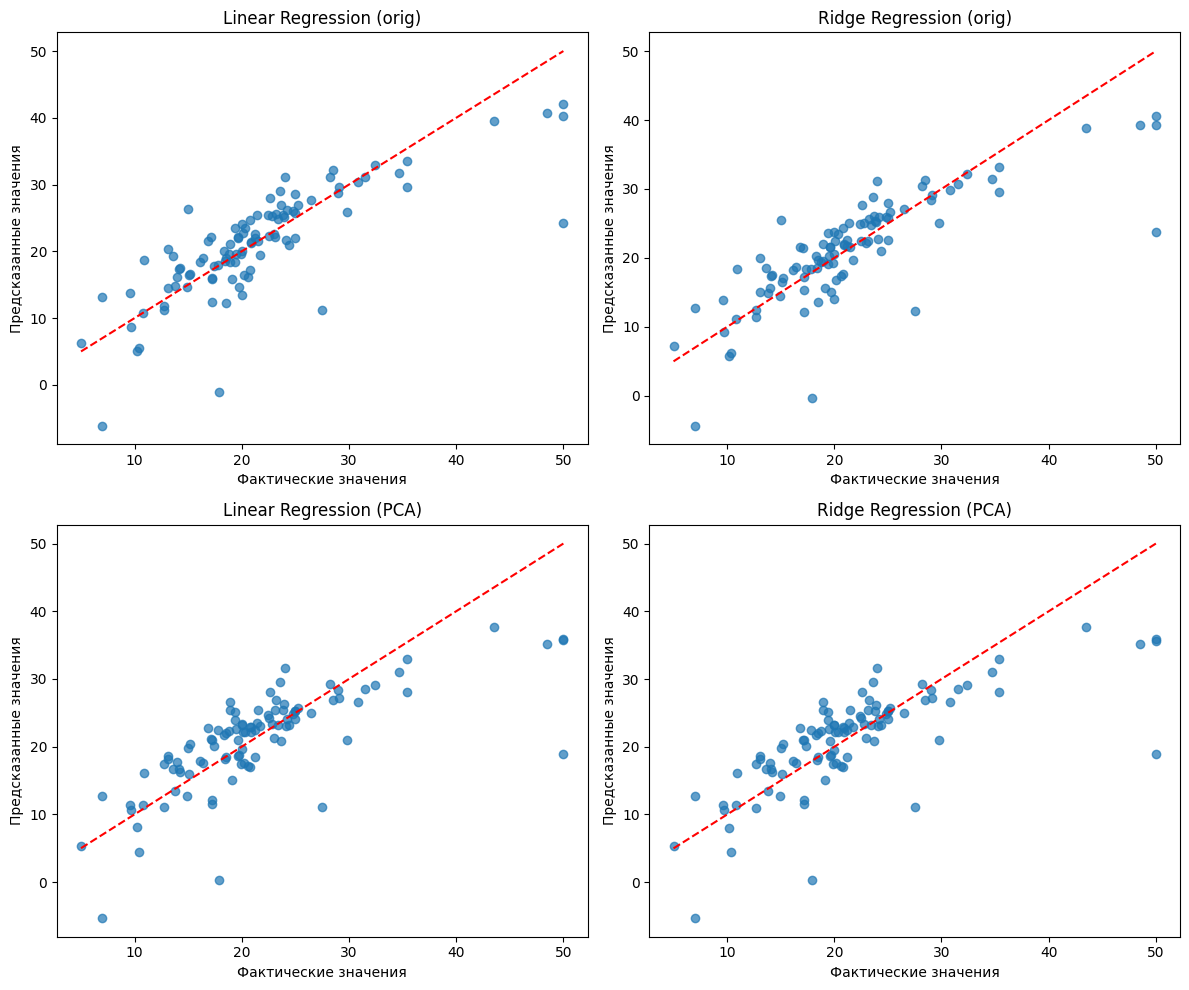

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def preprocess_boston(file_path: str):
    data = pd.read_csv(file_path, sep=",")
    data = data.dropna()
    y = data["MEDV"]
    data = data.drop(columns=["CHAS", "RAD","MEDV"])
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(data)
    X = pd.DataFrame(X_scaled, columns=data.columns)
    return X, y
X, y = preprocess_boston("Boston-house-price-data.csv")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Количество исходных признаков:", X.shape[1])
print("Количество компонент после PCA:", X_pca.shape[1])


X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):

    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"=== {model_name} ===")
    print("CV R² среднее:", np.mean(cv_scores))
    print("R² на тесте:", r2)
    print("RMSE на тесте:", rmse)
    print("MAPE на тесте:", mape)
    print()
    return y_pred, r2, rmse, mape


lr = LinearRegression()
ridge = Ridge(alpha=1.0)

print("Модели на исходных признаках:")
y_pred_lr_orig, r2_lr_orig, rmse_lr_orig, mape_lr_orig = evaluate_model(lr, X_train_orig, X_test_orig, y_train, y_test, "Linear Regression")
y_pred_ridge_orig, r2_ridge_orig, rmse_ridge_orig, mape_ridge_orig = evaluate_model(ridge, X_train_orig, X_test_orig, y_train, y_test, "Ridge Regression")


print("Модели на PCA-признаках:")
y_pred_lr_pca, r2_lr_pca, rmse_lr_pca, mape_lr_pca = evaluate_model(lr, X_train_pca, X_test_pca, y_train, y_test, "Linear Regression (PCA)")
y_pred_ridge_pca, r2_ridge_pca, rmse_ridge_pca, mape_ridge_pca = evaluate_model(ridge, X_train_pca, X_test_pca, y_train, y_test, "Ridge Regression (PCA)")


comparison = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Linear (PCA)", "Ridge (PCA)"],
    "R²": [r2_lr_orig, r2_ridge_orig, r2_lr_pca, r2_ridge_pca],
    "RMSE": [rmse_lr_orig, rmse_ridge_orig, rmse_lr_pca, rmse_ridge_pca],
    "MAPE": [mape_lr_orig, mape_ridge_orig, mape_lr_pca, mape_ridge_pca]
})

print("\nСравнение моделей:")
print(comparison)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models_preds = [
    ("Linear Regression (orig)", y_pred_lr_orig),
    ("Ridge Regression (orig)", y_pred_ridge_orig),
    ("Linear Regression (PCA)", y_pred_lr_pca),
    ("Ridge Regression (PCA)", y_pred_ridge_pca)
]

for ax, (title, y_pred) in zip(axes.ravel(), models_preds):
    ax.scatter(y_test, y_pred, alpha=0.7)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(title)
    ax.set_xlabel("Фактические значения")
    ax.set_ylabel("Предсказанные значения")

plt.tight_layout()
plt.show()
